In [46]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [47]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [29]:
path_data = '../data/data combined (aqcin)/combined aqicn data (all german cities).csv'

In [30]:
df_data_all_cities = pd.read_csv(path_data)

In [31]:
df_data = df_data_all_cities.copy()

In [32]:
df_data['date'] = pd.to_datetime(df_data['date'])
df_data.sort_values(by='date', ascending=True, inplace=True)
df_data.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, inplace=True)
df_data.replace(' ', np.nan, inplace=True) 
df_data['pm10'] = pd.to_numeric(df_data['pm10']) # , downcast='float'
df_data['pm25'] = pd.to_numeric(df_data['pm25']) # , downcast='float'
df_data.replace({'munich':'Munich','berlin,-germany':'Berlin',
            'potsdam-zentrum,-germany':'Potsdam',
            'hannover,-germany':'Hannover',
            'stuttgart-bad-cannstatt, germany':'Stuttgart',
            'dresden-bergstraße,-germany':'Dresden',
            'sternschanze,-hamburg, germany':'Hamburg',
            'frankfurt-schwanheim,-germany':'Frankfurt',
            'kiel-bahnhofstr.-verk., schleswig-holstein, germany':'Kiel'}, inplace=True )

In [33]:
# drop nan values
df_data.dropna(axis = 0, inplace = True)

In [34]:
df_data.isnull().sum()

date    0
city    0
pm25    0
pm10    0
dtype: int64

In [35]:
df_data.columns

Index(['date', 'city', 'pm25', 'pm10'], dtype='object')

In [36]:
# convert string columns into numeric 
df_data['pm25'] = pd.to_numeric(df_data['pm25'], errors='coerce')
df_data['pm10'] = pd.to_numeric(df_data['pm10'], errors='coerce')

In [37]:
df_data.reset_index(drop = True, inplace = True)

In [56]:
city = 'Hamburg'
df_city = df_data[df_data['city'] == city]

In [57]:
df_city = df_city.set_index('date')
df_city.index

DatetimeIndex(['2014-08-19', '2014-08-20', '2014-08-21', '2014-08-22',
               '2014-08-23', '2014-08-24', '2014-08-25', '2014-08-26',
               '2014-08-27', '2014-08-28',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27'],
              dtype='datetime64[ns]', name='date', length=3299, freq=None)

In [58]:
y = df_city['pm25'].resample('MS').mean()

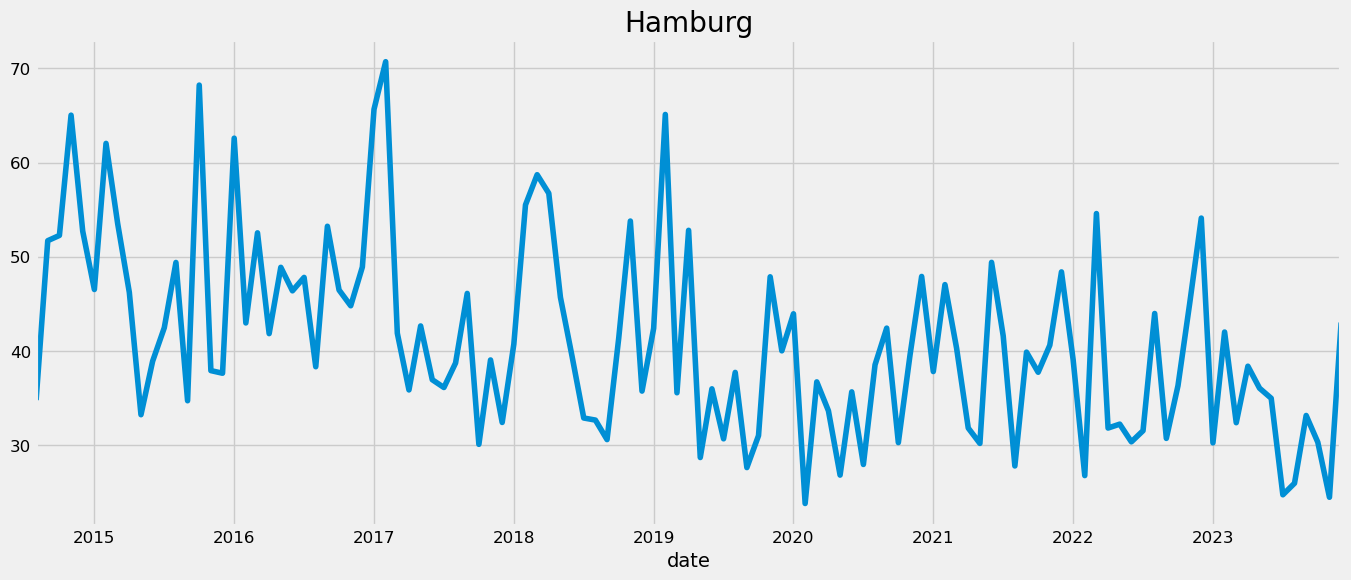

In [61]:
y.plot(figsize=(15, 6))
plt.title(f'{city}')
plt.show()

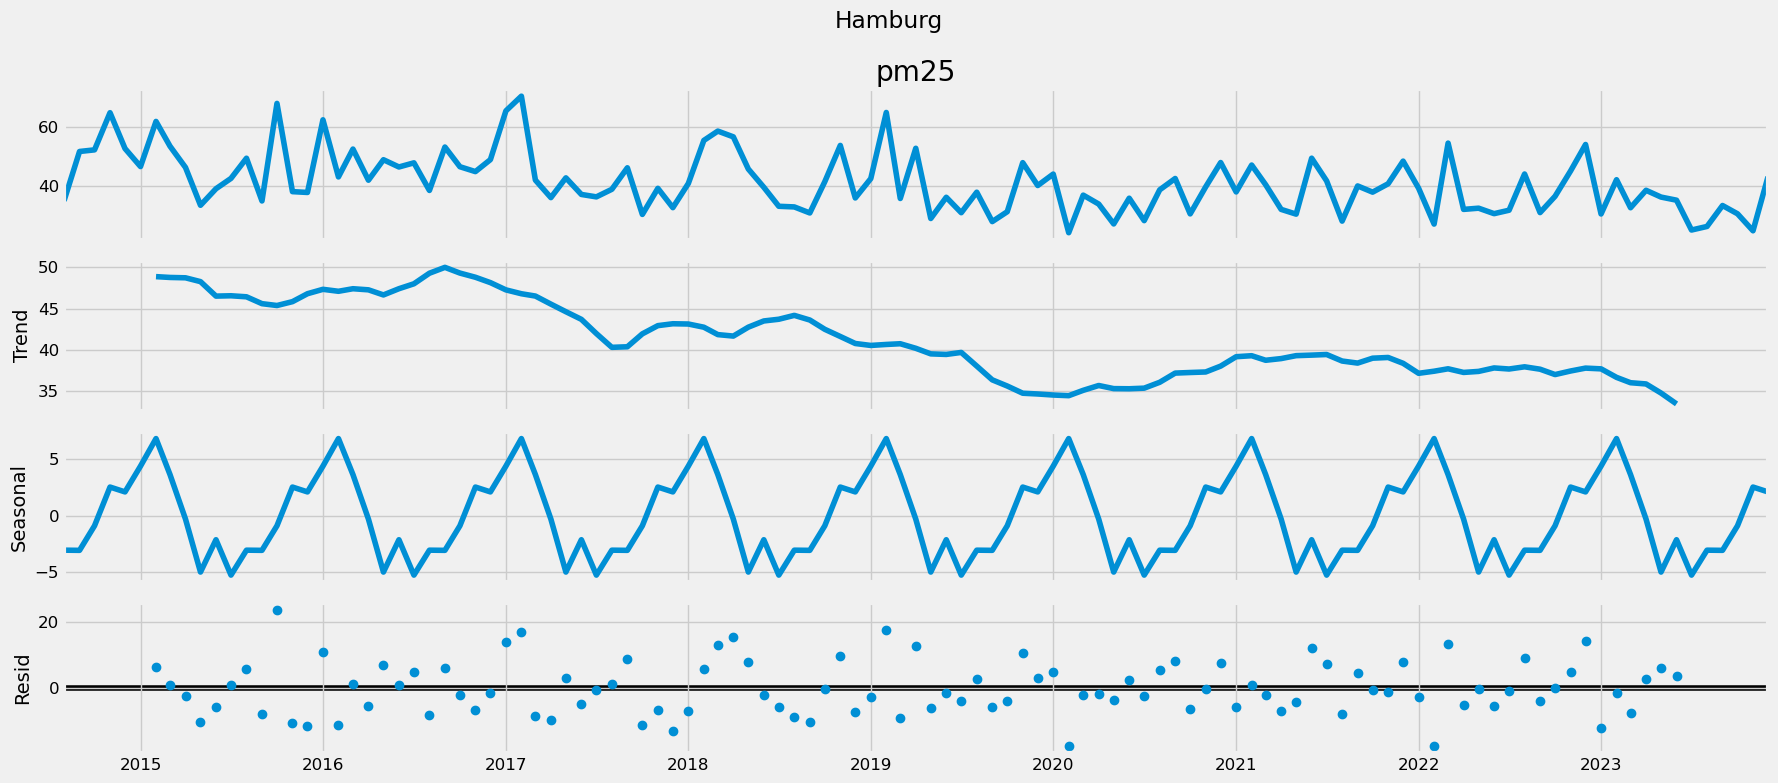

In [64]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.suptitle(f'{city}')
plt.tight_layout()
plt.show()

## Forecasting using Arima model

In [66]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [76]:
minimum_aic

636.7138278034444

In [77]:
minimum_aic = 999999

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < minimum_aic:
                minimum_aic = results.aic
                minimum_aic_param = param
                minimum_aic_param_seasonal = param_seasonal
                
            else:
                pass
        except:
            continue                      

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1159.4399067869156
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:952.4142958765048
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:791.5745928916737
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:663.8515243986175
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:793.1590411590914
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:742.1683522360426
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:673.3642252455655
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:668.3257492953676
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1048.9350041354728
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:899.3241210913499
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:784.6357997615755
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:656.0977493123273
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:794.7371555586695
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:737.3158316396278
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:674.2505634810703
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:661.5495586869782
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:871.5932085261485
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:783.3912013599786
ARIMA(0,

In [78]:
print(minimum_aic)
print(minimum_aic_param)
print(minimum_aic_param_seasonal)

636.7138278034444
(0, 1, 1)
(0, 1, 1, 12)


In [79]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

In [81]:
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9654      0.066    -14.593      0.000      -1.095      -0.836
ma.S.L12      -1.2132      0.222     -5.473      0.000      -1.648      -0.779
sigma2        55.0126     16.992      3.238      0.001      21.710      88.316


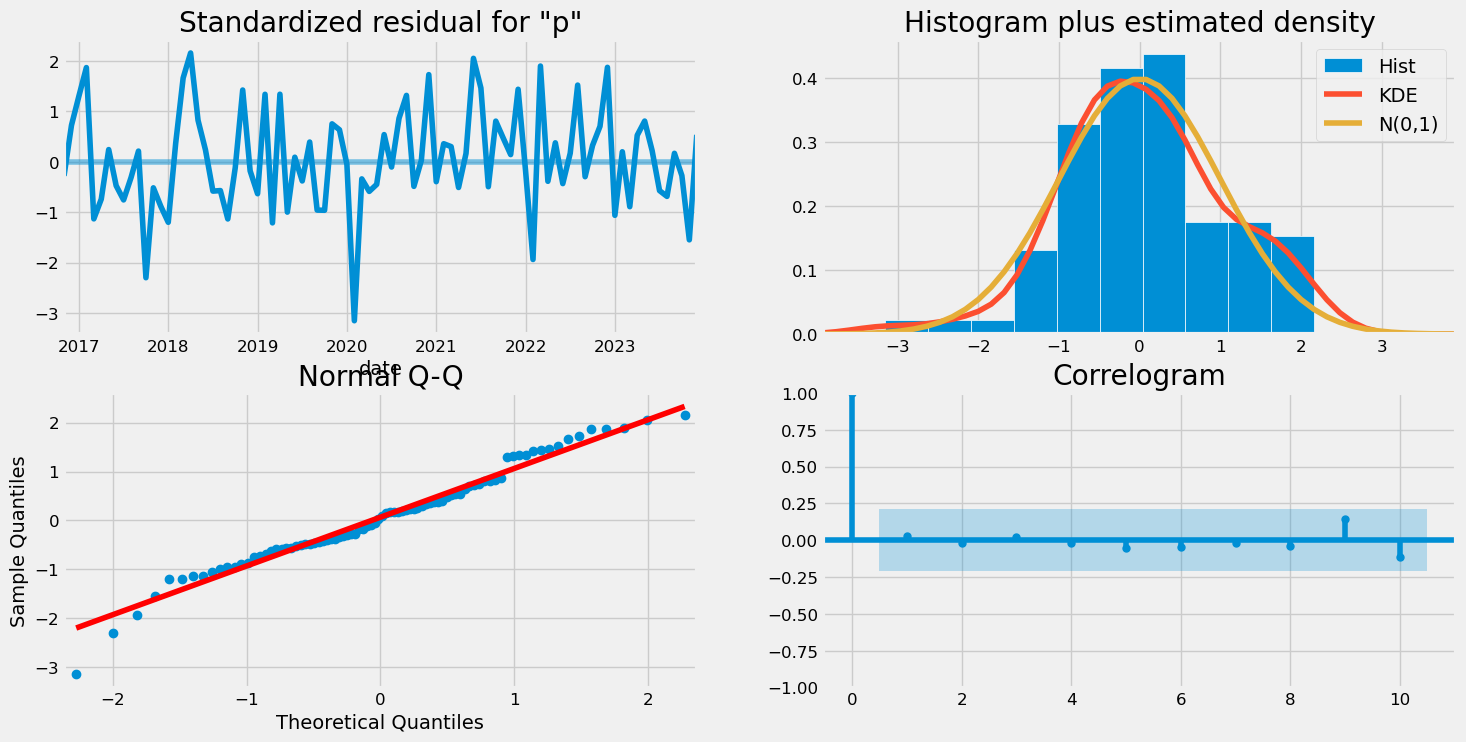

In [82]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

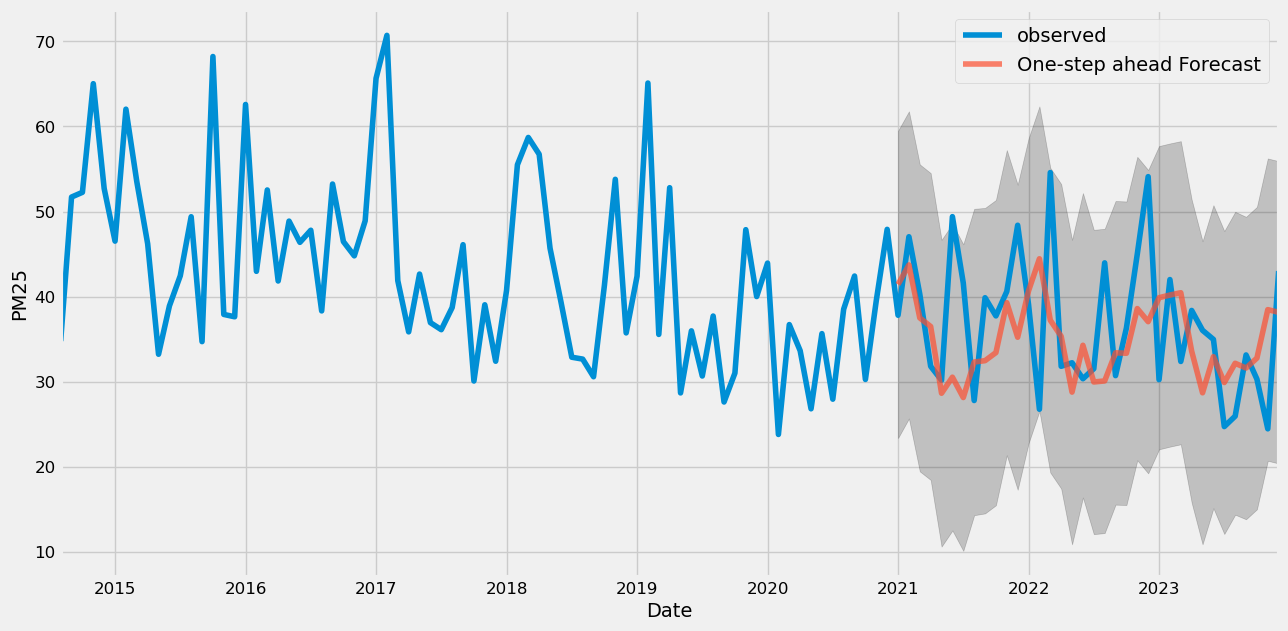

In [84]:
pred = results.get_prediction(start = pd.to_datetime('2021-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('PM25')
plt.legend()
plt.show()

In [86]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 72.22


In [87]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 8.5


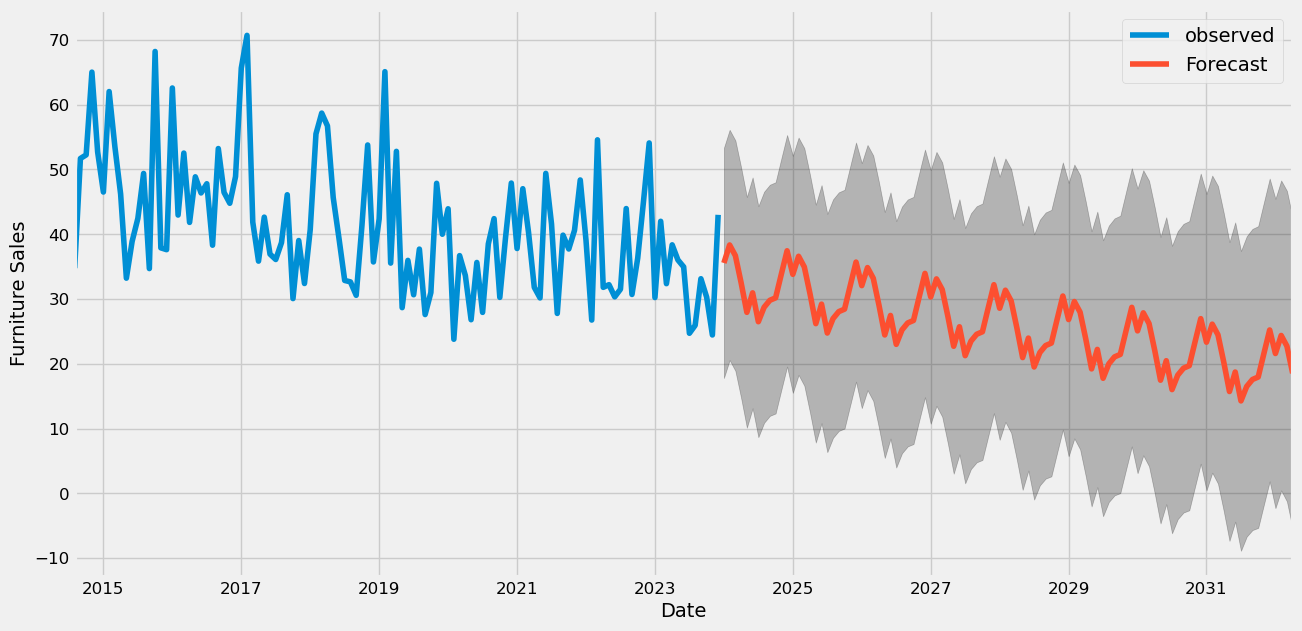

In [90]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()